In [257]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import cv2 as cv
import os
import sys
import time

In [258]:
def series_to_df(series,name,val):
  res_df = series.reset_index()
  res_df.columns = ['index',name, val]
  return res_df

In [259]:
cwd = os.getcwd()
data_csv_path = os.path.join("data.csv")
new_img_path = os.path.join(cwd,"/img")
org_img_path = 'F:\hackathon'

In [260]:
category = os.listdir(org_img_path)
files = []
for cat in category:
  f = os.listdir(os.path.join(org_img_path,cat))
  files.append(len(f))
  
category = {"category":category,"amount":files}
category = pd.DataFrame(category)

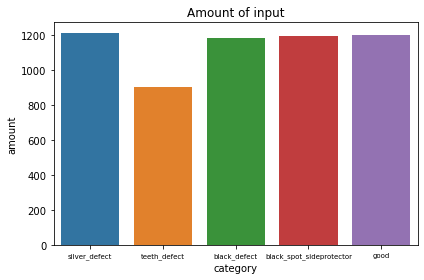

In [261]:
ax = sns.barplot(data=category,x="category",y="amount",orient='v')
ax.set(title='Amount of input')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
plt.tight_layout()
plt.show()

In [262]:
df = pd.read_csv(data_csv_path)
df.head()

,index,filename,category,runtime,silver_defect,black_defect,blackspot,teeth_defect
0,0,d:\PROJECTS\frauenhoferhackathon\imgs\cam4_001...,black_defect,0.777828,(),True,True,False
1,1,d:\PROJECTS\frauenhoferhackathon\imgs\cam4_001...,black_defect,0.809275,(),True,False,False
2,2,d:\PROJECTS\frauenhoferhackathon\imgs\cam4_001...,black_defect,0.792393,(),True,False,False
3,3,d:\PROJECTS\frauenhoferhackathon\imgs\cam1_001...,black_defect,0.672887,(),True,False,False
4,4,d:\PROJECTS\frauenhoferhackathon\imgs\cam4_001...,black_defect,0.647328,(),True,False,False


## Time distribution

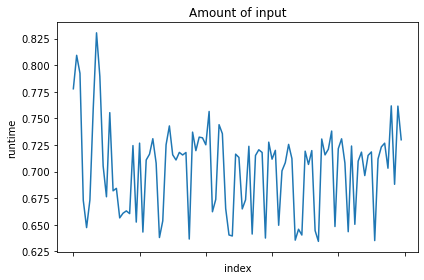

In [263]:
ax = sns.lineplot(data=df,x="index",y="runtime")
ax.set(title='Amount of input')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
plt.tight_layout()
plt.show()

## Category Frequencies

In [264]:
real_cat = df.value_counts("category")
real_cat = real_cat.to_frame()
real_cat_df = real_cat.reset_index()
real_cat_df.columns = ['categories', 'frequency']

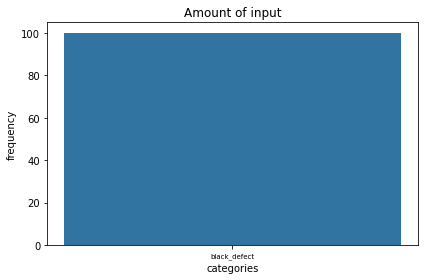

In [265]:

ax = sns.barplot(data=real_cat_df,x='categories',y='frequency')
ax.set(title='Amount of input')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
plt.tight_layout()
plt.show()

## Processedimage Frequencies

In [266]:
defect = {
  'good':0,
  'black_defect':0,
  'blackspot':0,
  'silver_defect':0,
  'teeth_defect':0,
}
"""
*********************
ADD SILVER DEFECTTTTTTTTTTTTTTTTT
*********************

"""
for index,row in df.iterrows():
 
  if row['black_defect'] == True:
    defect['black_defect'] += 1
    
  if row['teeth_defect'] == True:
    defect['teeth_defect'] += 1
    
  if row['blackspot'] == True:
    defect['blackspot'] += 1
    
  if row['blackspot'] == False and row['teeth_defect'] == False and row['black_defect'] == False:
    defect['good'] += 1

In [267]:
to_plot = {"categories":list(defect.keys()),"frequency":list(defect.values())}

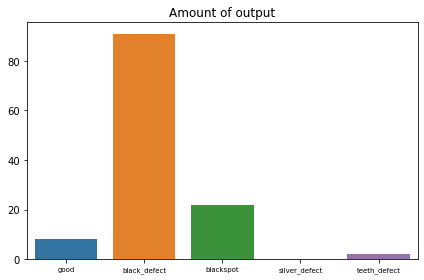

In [268]:
ax = sns.barplot(data=to_plot,x='categories',y='frequency')
ax.set(title='Amount of output')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
plt.tight_layout()
plt.show()